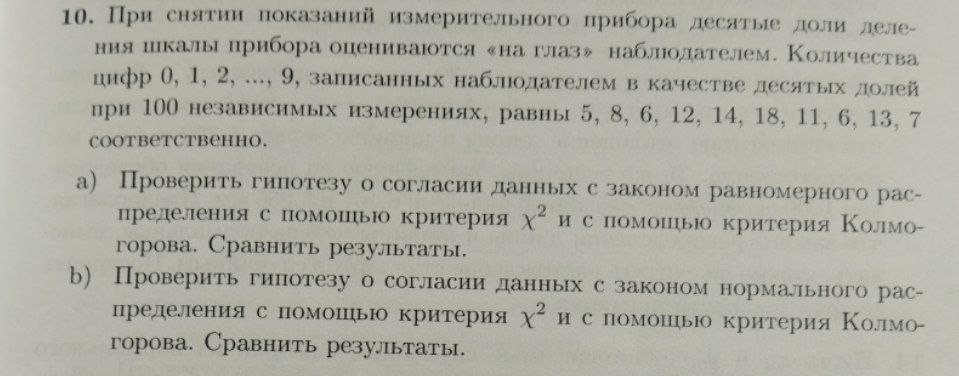

In [95]:
from IPython.display import Image

Image("images/task_10.jpg")

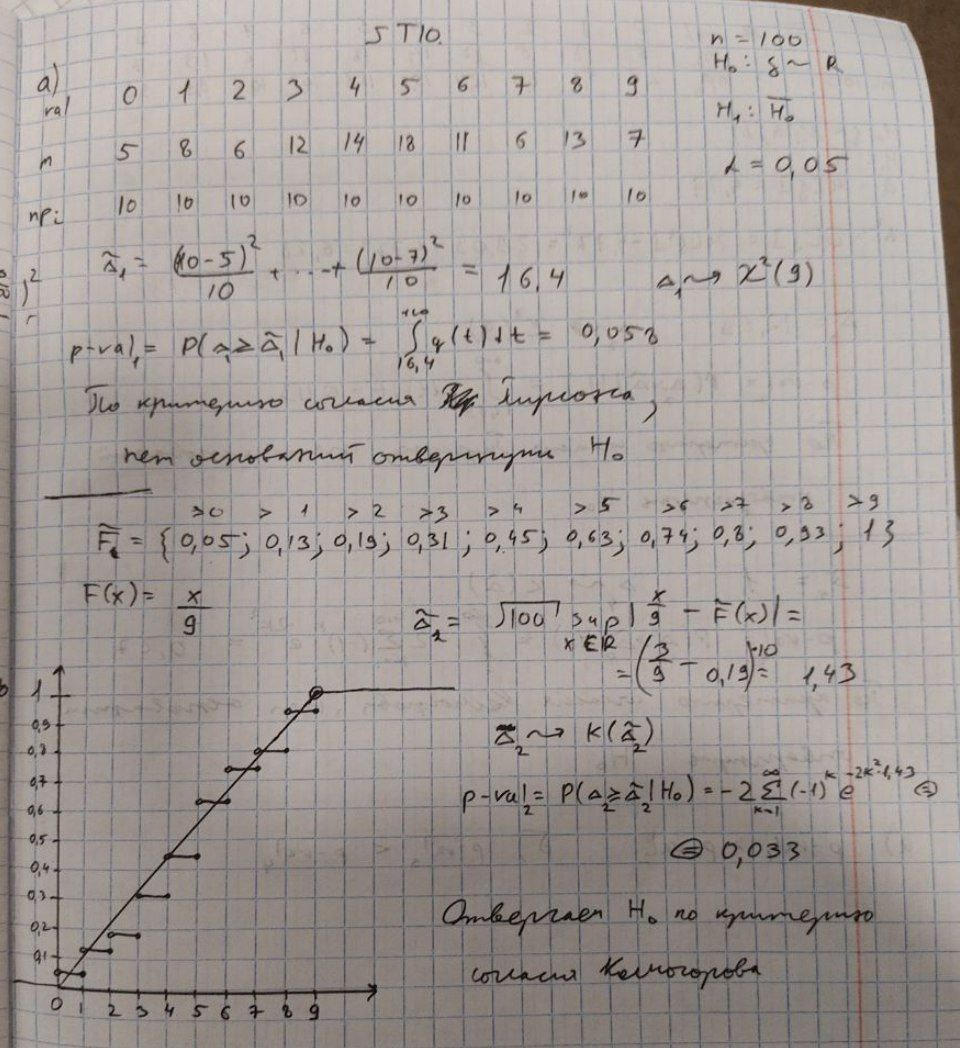

In [96]:
Image("images/answer_10_1.jpg")

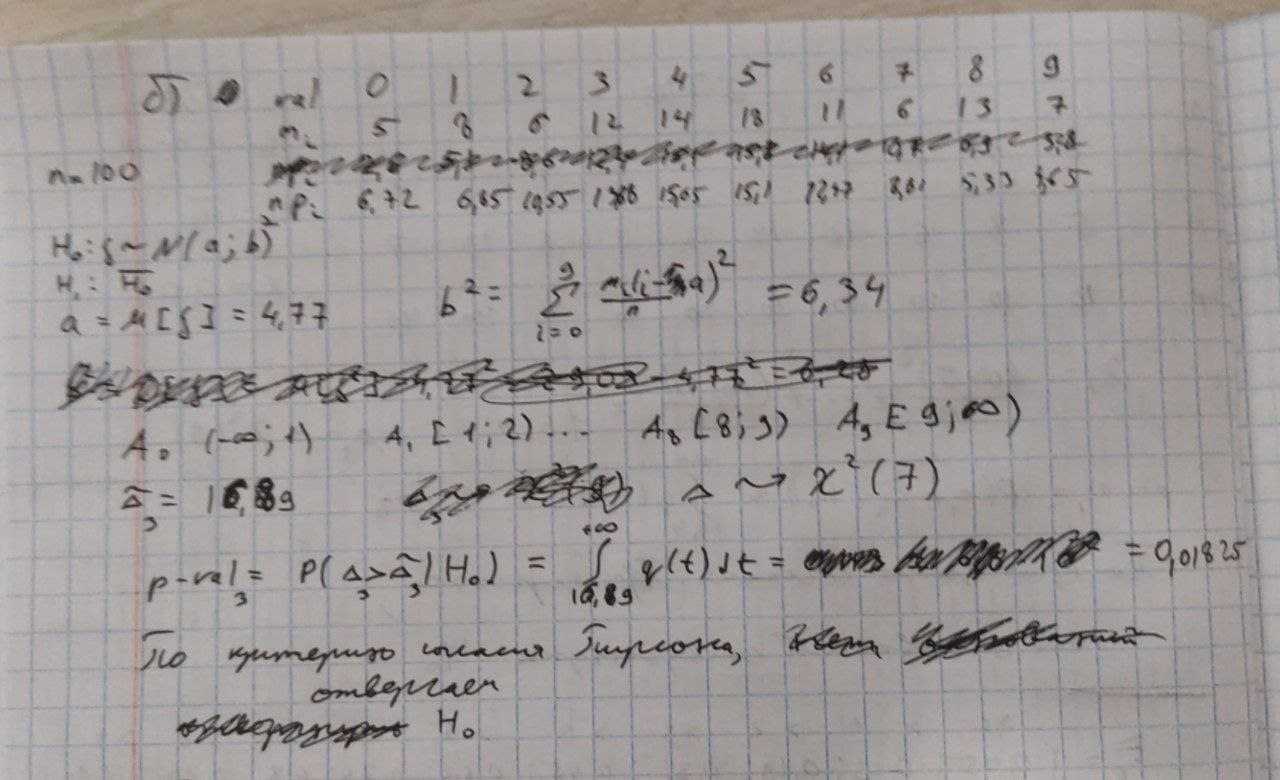

In [97]:
Image("images/answer_10_2.jpg")

In [98]:
import numpy as np
import math
import matplotlib.pyplot as plt


N = 100
m = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])

F_emp = np.array([sum(m[:i]) for i in range(len(m) + 1)]) / N

In [99]:
def gauss_cdf(val, mu, std_dev):
    """Gaussian cumulative distribution function."""
    return 1/2 * (1 + math.erf((val - mu)/(np.sqrt(2) * std_dev)))

bootstrap_n = 50000

In [100]:
semi_intervals = np.array([(-np.inf, 1)] + [(i, i + 1) for i in range(1, 9)] + [(9, np.inf)])
data = np.repeat(np.arange(len(m)), m)

mu = np.mean(data)
std_dev = np.sqrt(np.var(data) * N/(N-1))

def emp_gauss_cdf(val): 
    return gauss_cdf(val, mu, std_dev)
def bootstrap_gaussian_cdf(j):
  return gauss_cdf(bootstrap_sample[j], mu_bootstrap, std_dev_bootstrap)


bootstrap_stat = []

values = np.arange(10)
test_stat = np.sqrt(N) * np.max([max(np.abs(emp_gauss_cdf(values[i]) - F_emp[i]),
                                      np.abs(emp_gauss_cdf(values[i]) - F_emp[i + 1])) for i in range(10)])

for _ in range(bootstrap_n):
    bootstrap_sample = np.array(sorted(np.random.normal(mu, std_dev, N)))
    mu_bootstrap = bootstrap_sample.mean()
    std_dev_bootstrap = np.sqrt(bootstrap_sample.var() * N/(N - 1))

    F_emp_bootstrap = [i / N for i in range(N + 1)]

    sup_bootstrap = np.sqrt(N) * np.max([max(np.abs(bootstrap_gaussian_cdf(j) - F_emp_bootstrap[j]), \
                                     np.abs(bootstrap_gaussian_cdf(j) - F_emp_bootstrap[j+1])) \
                                        for j in range(len(bootstrap_sample))])

    bootstrap_stat.append(sup_bootstrap)

bootstrap_stat = np.array(bootstrap_stat)

p_value = len(bootstrap_stat[bootstrap_stat >= test_stat]) / bootstrap_n

print(f"p-value_2 = {p_value}")

p-value_2 = 0.01612


По обоим критериям гипотеза отвергается, а также ***p_value_2*** < ***p_value_1***, полученного с помощью критерия Пирсона.